In [197]:
import pandas as pd

In [198]:
import seaborn as sns

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [201]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


there is no missing values in the loan datasets

there is no categorical features

## Exploratory data analysis

In [203]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='0']

In [204]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]

In [205]:
numerical_features

['customer_id',
 'credit_lines_outstanding',
 'loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score',
 'default']

In [215]:
discrete_features.remove('default')

In [216]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

In [217]:
continuous_features.remove('customer_id')

In [227]:
continuous_features.remove('default')

In [228]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=15):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [229]:
default=df[['customer_id','default']]
default.columns=['Customer_id','default']
default_total=default.groupby(default['default']).count()
default_percentage=default_total/default_total.sum()*100
default_percentage

,Customer_id
default,
0,81.49
1,18.51


Text(0, 0.5, 'customer_count%')

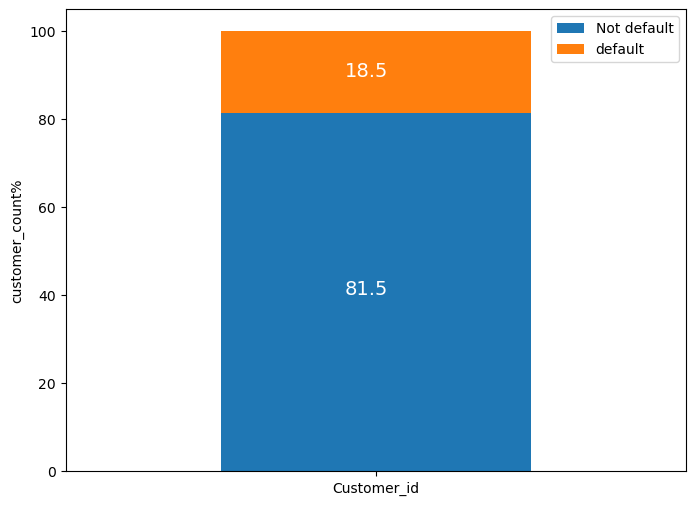

In [230]:
ax=default_percentage.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Not default','default'],loc='upper right')
plt.ylabel('customer_count%')

- 18.5% of customers are at default as ahown in the above figure

In [231]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of default or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Not default": dataframe[dataframe["default"]==0][column],
    "default":dataframe[dataframe["default"]==1][column]})
    # Plot the histogram
    temp[["Not default","default"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, rot=0)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [232]:
for feature in discrete_features:
    # Extract the relevant columns
    default = df[[feature, 'default']]
    
    # Group by the feature and count the number of defaults
    default_total = default.groupby(feature)['default'].count()
    default_sum = default.groupby(feature)['default'].sum()
    # Calculate the percentage of defaults for each category
    default_percentage = (default_sum / default_total) * 100
    print(default_percentage)

    # Create a DataFrame from the default percentage series
    default_percentage_df = pd.DataFrame(default_percentage).reset_index()
    default_percentage_df.columns = [feature, 'default_percentage']
    
    # Save the DataFrame in the dictionary using the feature name as the key
    default_percentage_dfs[feature] = default_percentage_df
    


credit_lines_outstanding
0     0.000000
1     0.000000
2     0.776053
3    22.871452
4    85.123967
5    99.845798
Name: default, dtype: float64
years_employed
0     68.750000
1     56.707317
2     33.575581
3     32.217811
4     21.644612
5     12.160062
6      8.023952
7      3.012048
8      4.363636
9      0.000000
10     0.000000
Name: default, dtype: float64


In [233]:
# Extract the DataFrame for 'years_employed' from the dictionary
years_employed_df = pd.DataFrame(default_percentage_dfs['years_employed'])
credit_lines_outstanding_df = pd.DataFrame(default_percentage_dfs['credit_lines_outstanding'])
# Display the extracted DataFrame
print(years_employed_df.head())
print(credit_lines_outstanding_df.head())

   years_employed  default_percentage
0               0           68.750000
1               1           56.707317
2               2           33.575581
3               3           32.217811
4               4           21.644612
   credit_lines_outstanding  default_percentage
0                         0            0.000000
1                         1            0.000000
2                         2            0.776053
3                         3           22.871452
4                         4           85.123967


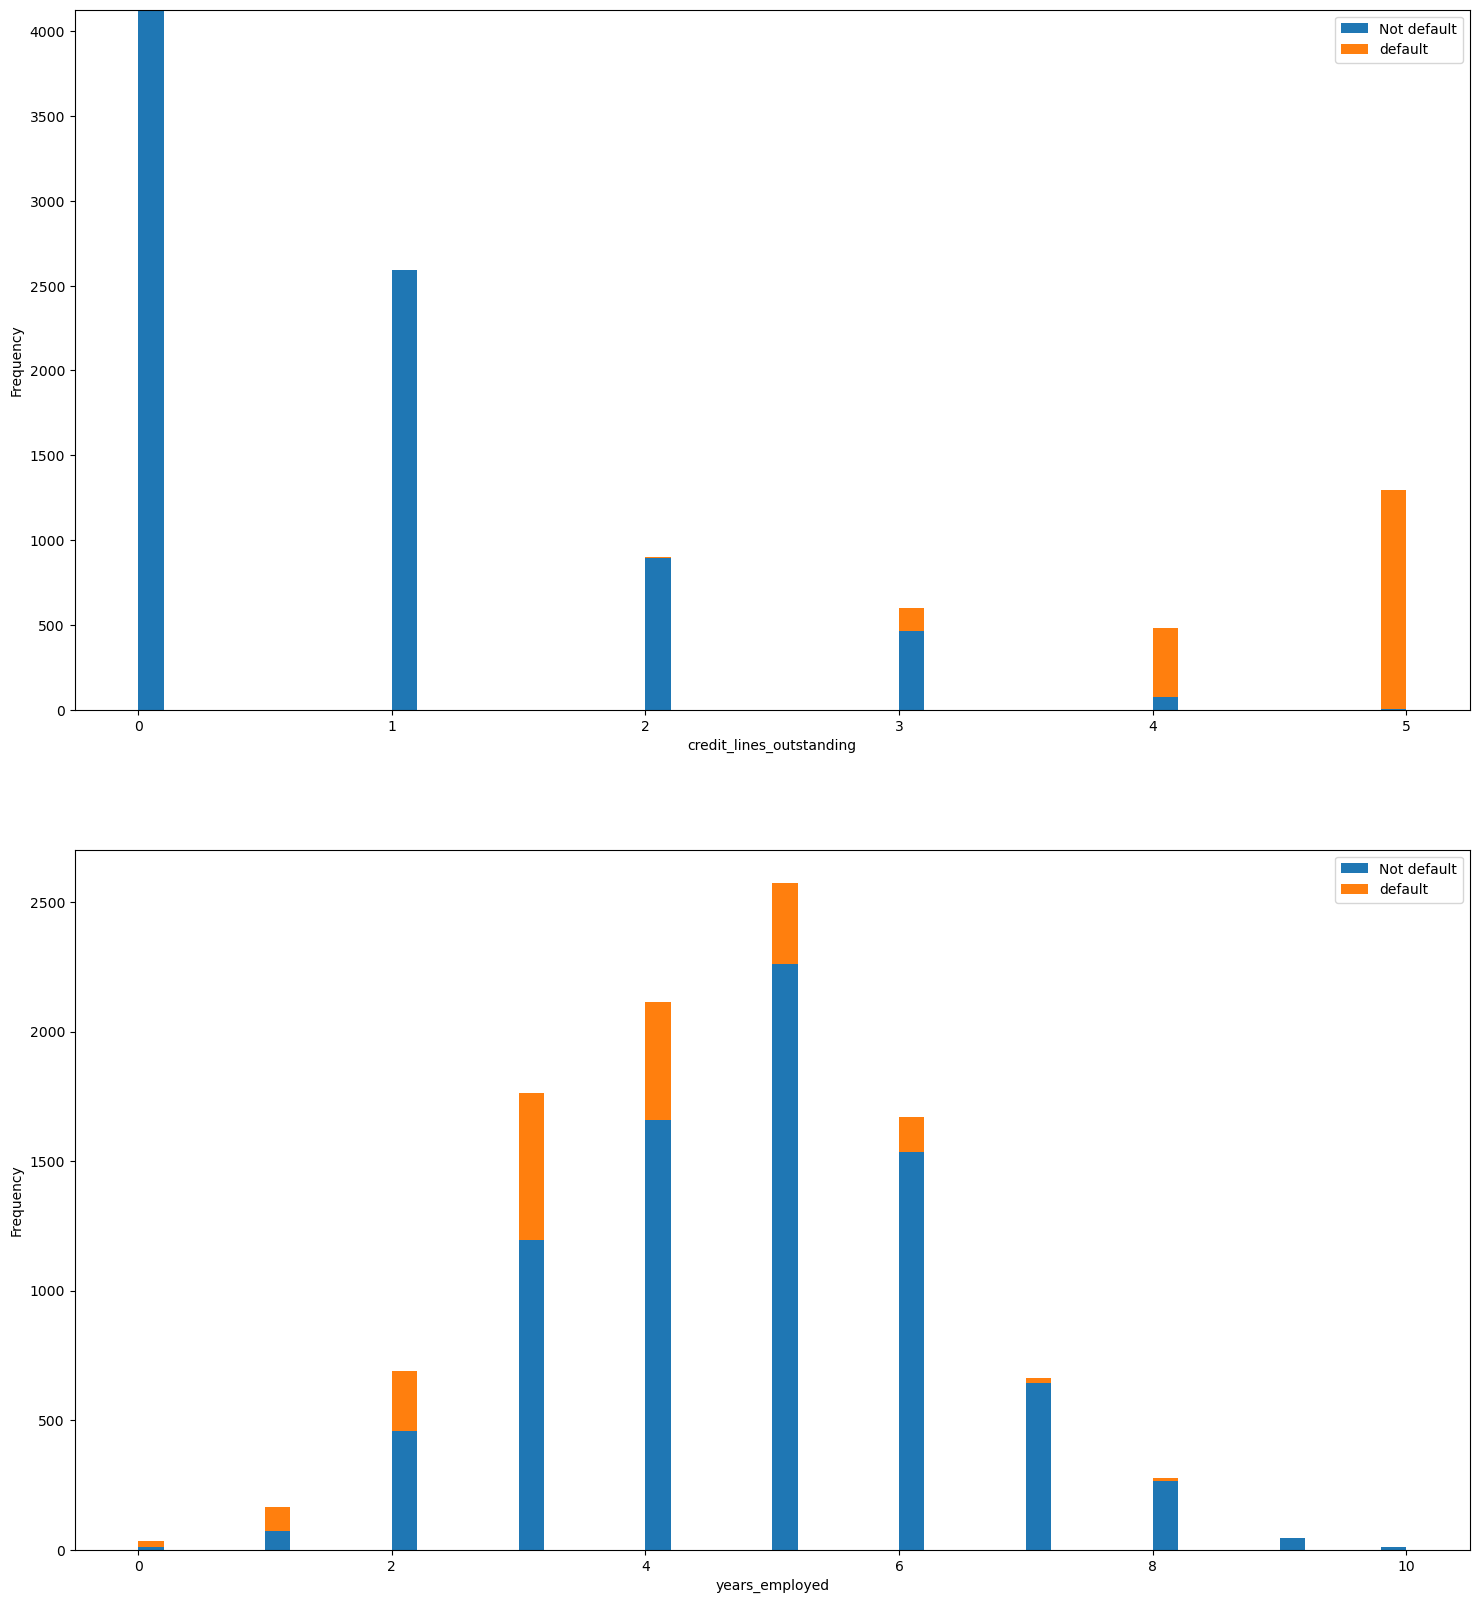

In [234]:
fig, axs = plt.subplots(nrows=2, figsize=(18,20))

# Plot histogram
iteration = 0
for feature in discrete_features:
    plot_distribution(df, feature, axs[iteration])
    iteration= iteration+1

- if we see in credit_lines_outstanding, default customers can seen at 3,4,5 credit lines, with 5 being the highest 
- customers who are employed more than 6 years are less likey to be at default

Text(0, 0.5, 'default_percentage')

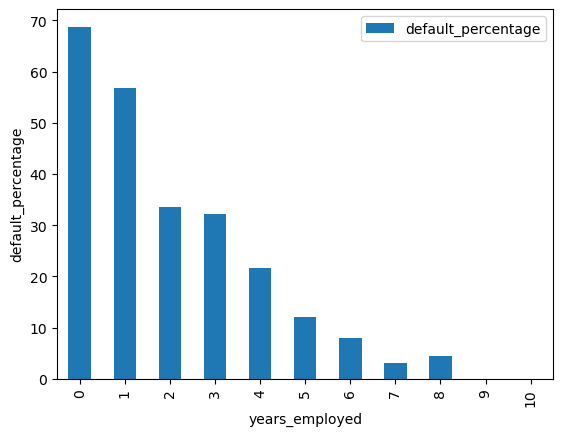

In [235]:
years_employed_df.plot(kind = 'bar', x = 'years_employed', y = 'default_percentage')
plt.xlabel('years_employed')
plt.ylabel('default_percentage')

the default percentage is decrasing with increasing number of years of employment

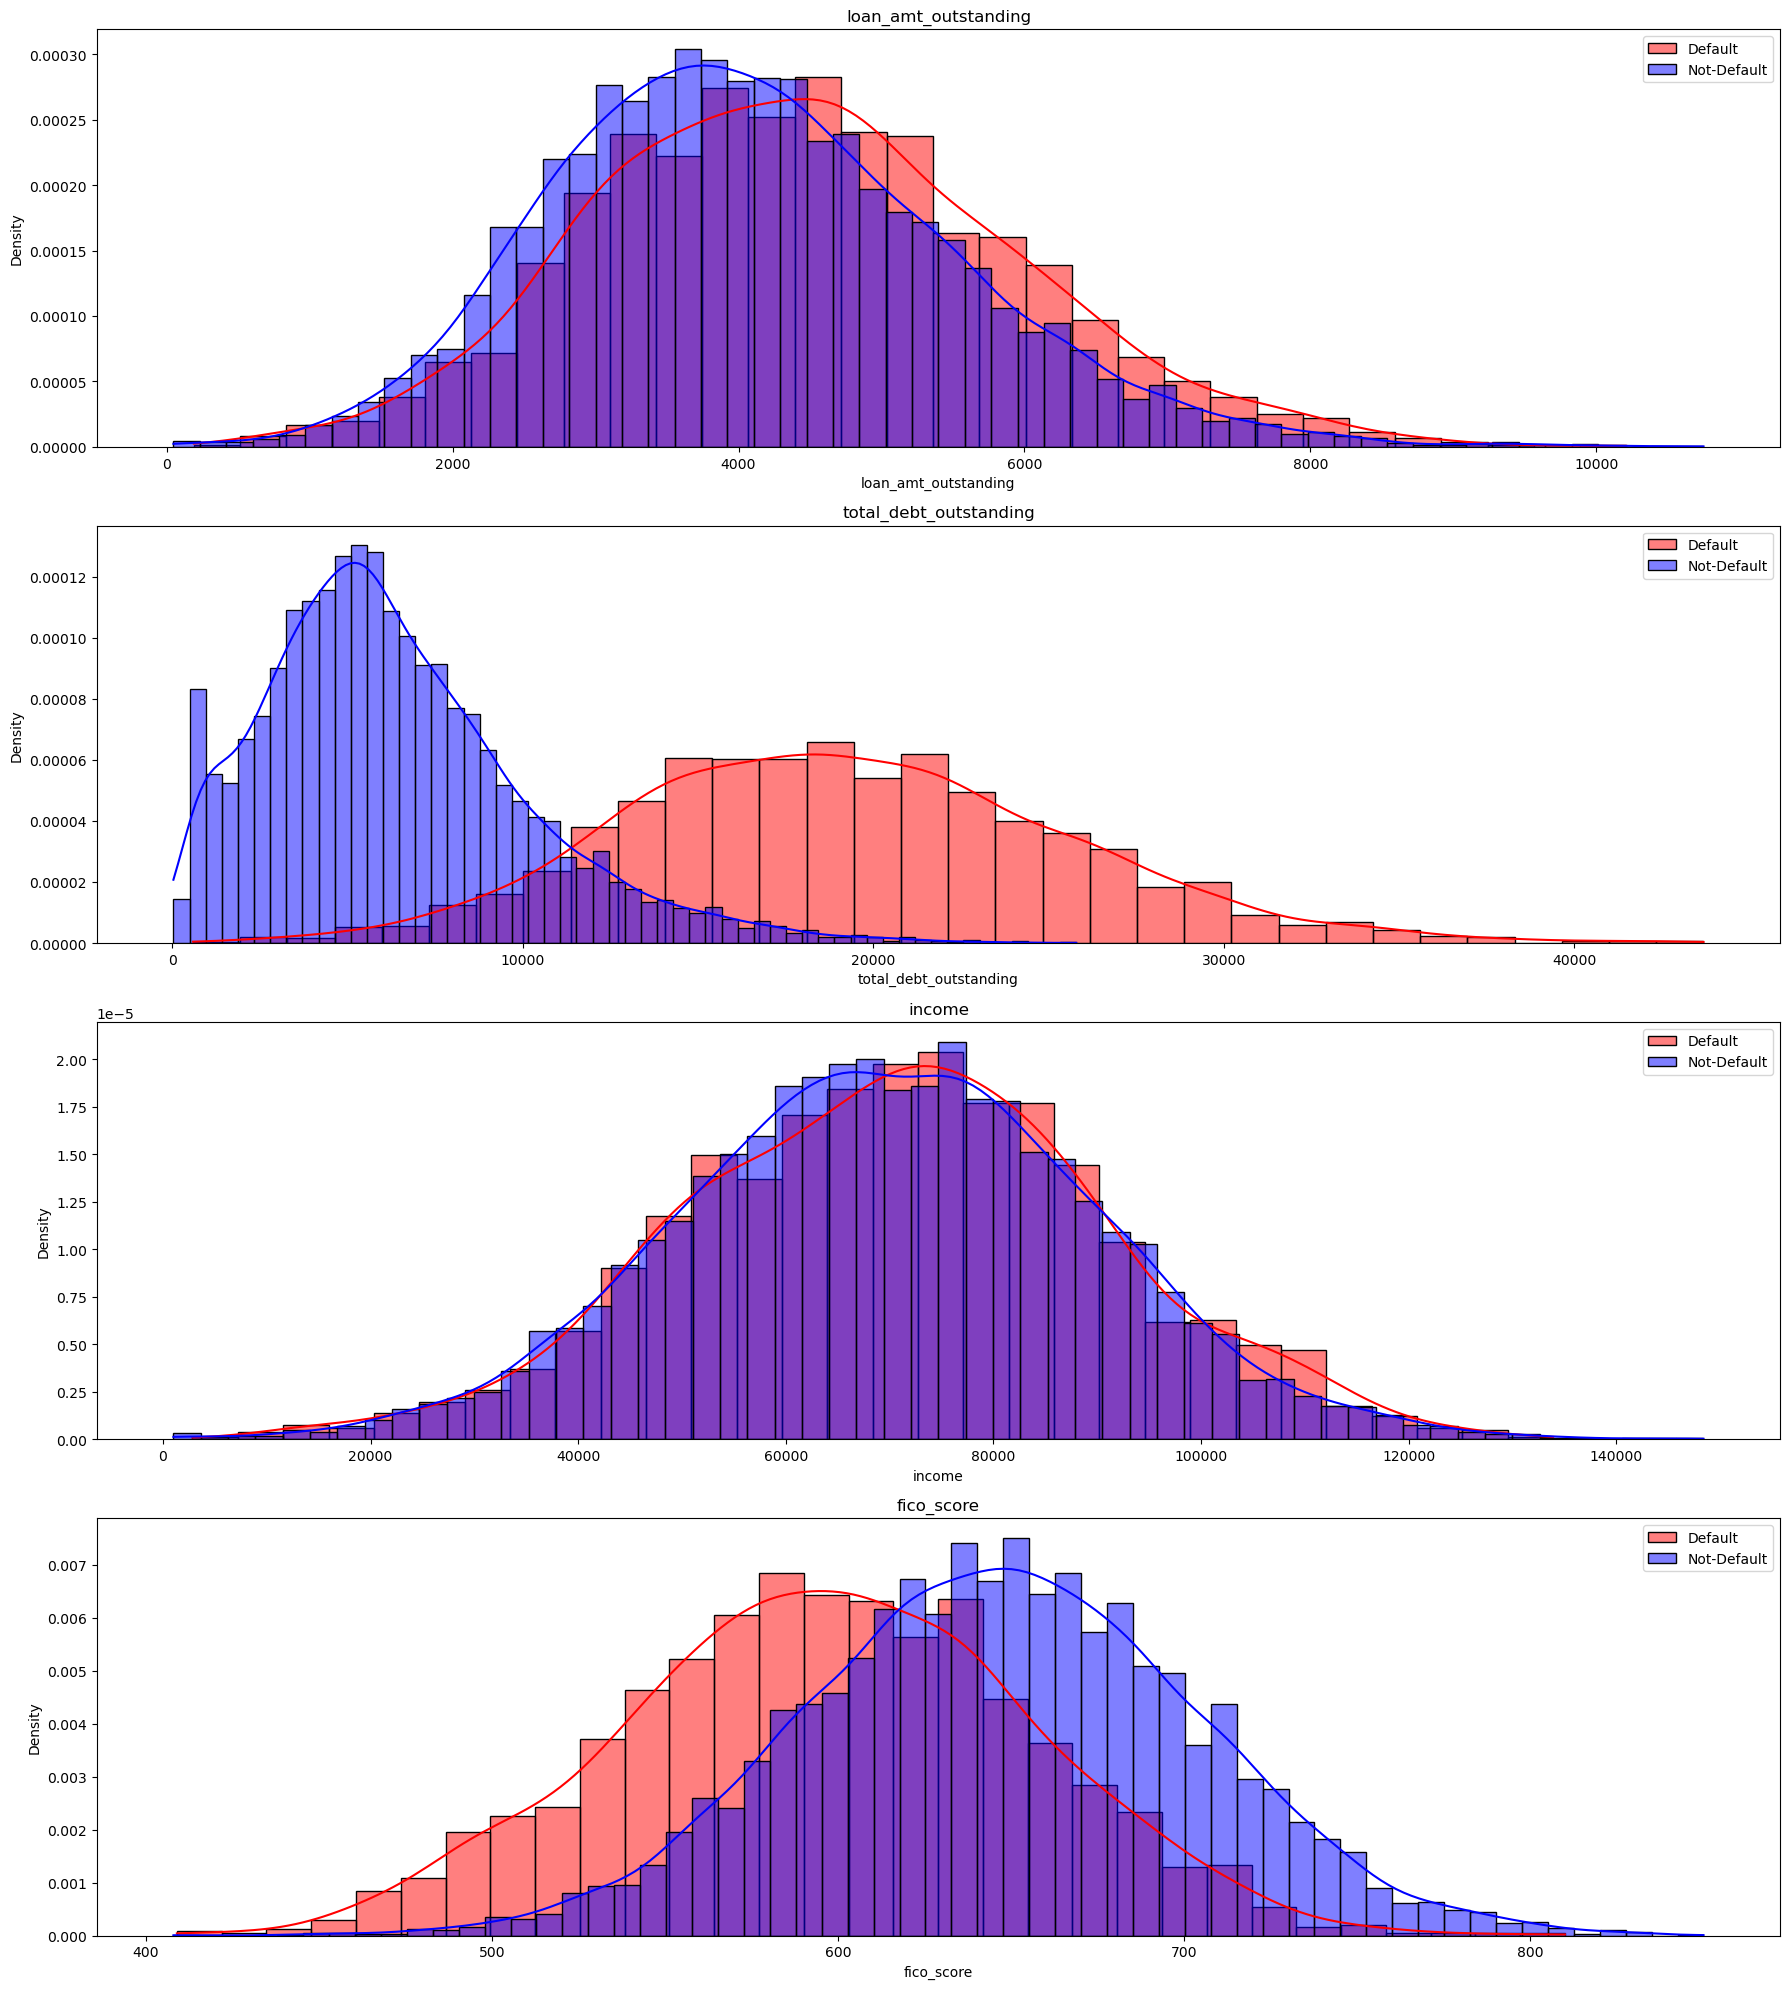

In [236]:
fig, axs = plt.subplots(nrows=len(continuous_features), figsize=(18, 20))

for iter, feature in enumerate(continuous_features):
    # Plot the distribution of the feature for defaults in red
    sns.histplot(df[df['default'] == 1][feature], color='red', label='Default', kde=True, stat='density', ax=axs[iter])
    
    # Plot the distribution of the feature for non-defaults in blue
    sns.histplot(df[df['default'] == 0][feature], color='blue', label='Not-Default', kde=True, stat='density', ax=axs[iter])

    # Add labels, title, and legend to each subplot
    axs[iter].set_xlabel(feature)
    axs[iter].set_ylabel('Density')
    axs[iter].set_title(feature)
    axs[iter].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- default customers lies between 10000 and 30000 of total debt oustanding

## Feature Engineering

#### Distribution plots of continuous features

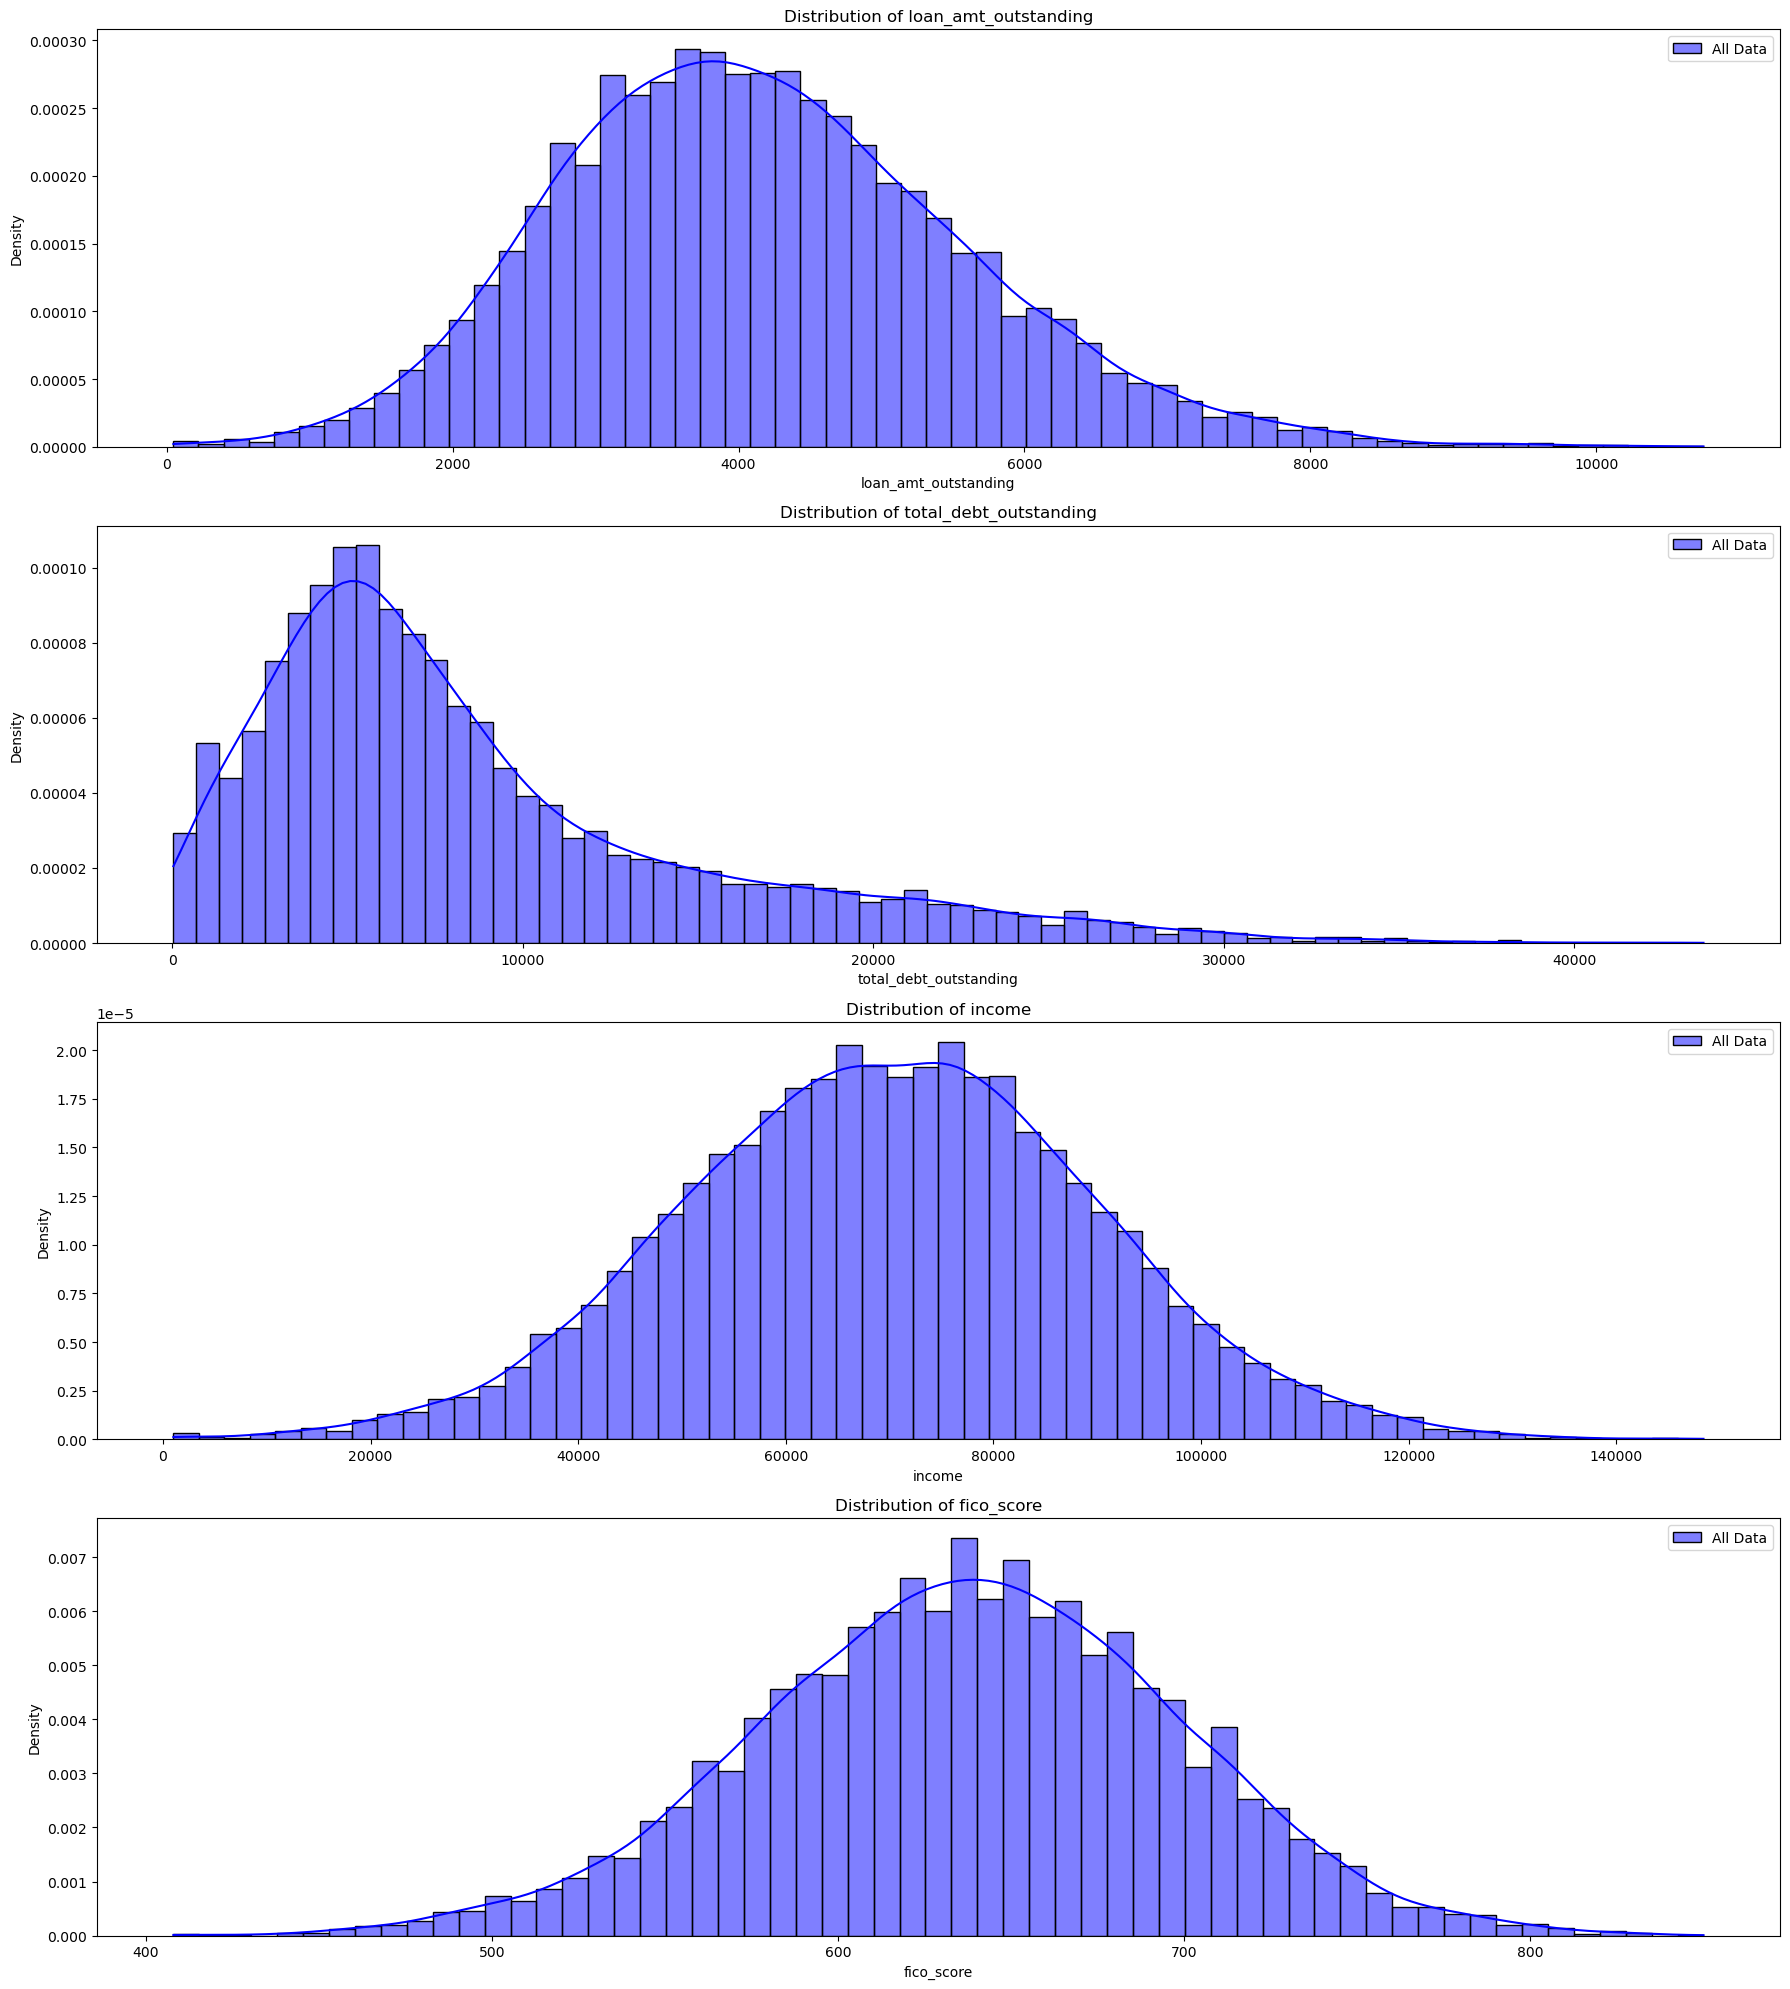

In [239]:
fig, axs = plt.subplots(nrows=len(continuous_features), figsize=(18, 20))

for iter, feature in enumerate(continuous_features):
    # Plot the distribution of the feature
    sns.histplot(df[feature], kde=True, ax=axs[iter], color='blue', label='All Data', stat='density')

    # Add labels, title, and legend to each subplot
    axs[iter].set_xlabel(feature)
    axs[iter].set_ylabel('Density')
    axs[iter].set_title(f'Distribution of {feature}')
    axs[iter].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [240]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
PowerTransformer_scaled = transformer.fit_transform(df[continuous_features])
PowerTransformer_scaled = pd.DataFrame(PowerTransformer_scaled, columns=continuous_features)

C:\Users\user\AppData\Local\Temp\ipykernel_13440\4014830633.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, ax = ax, color="red")
C:\Users\user\AppData\Local\Temp\ipykernel_13440\4014830633.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, ax = ax, color="red")
C:\Users\u

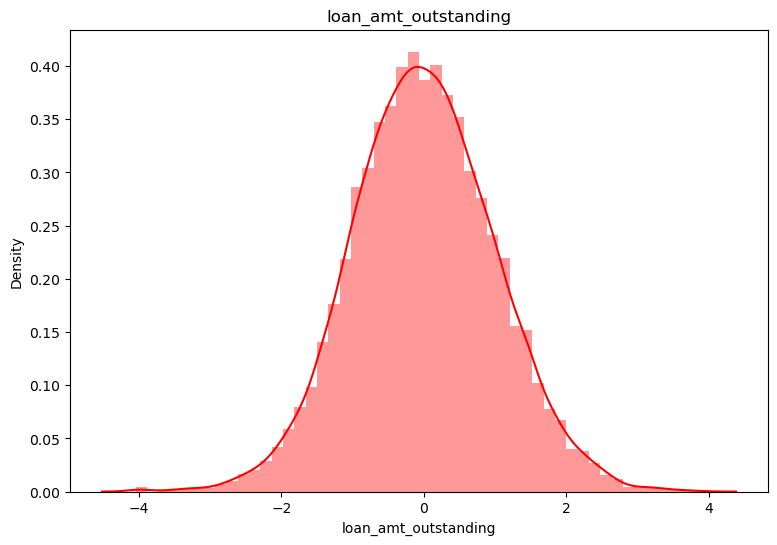

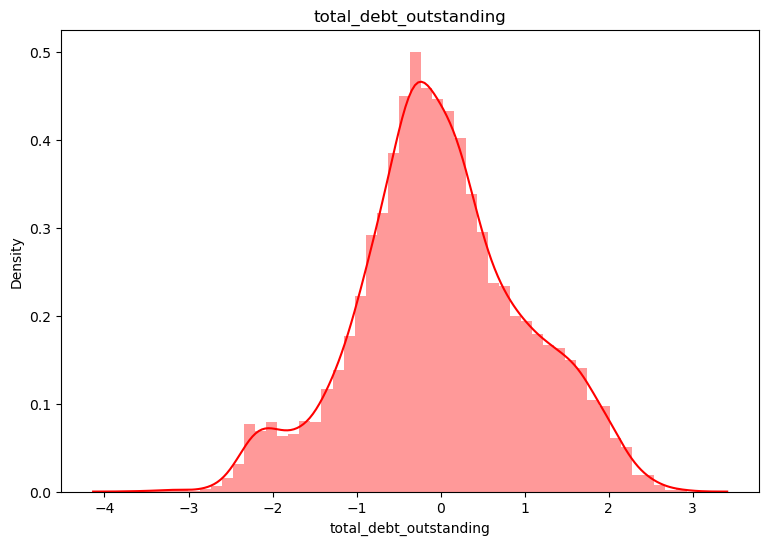

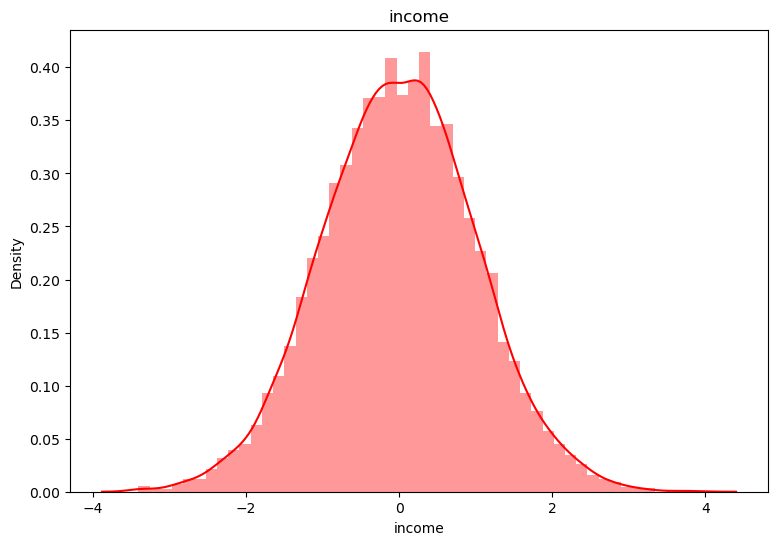

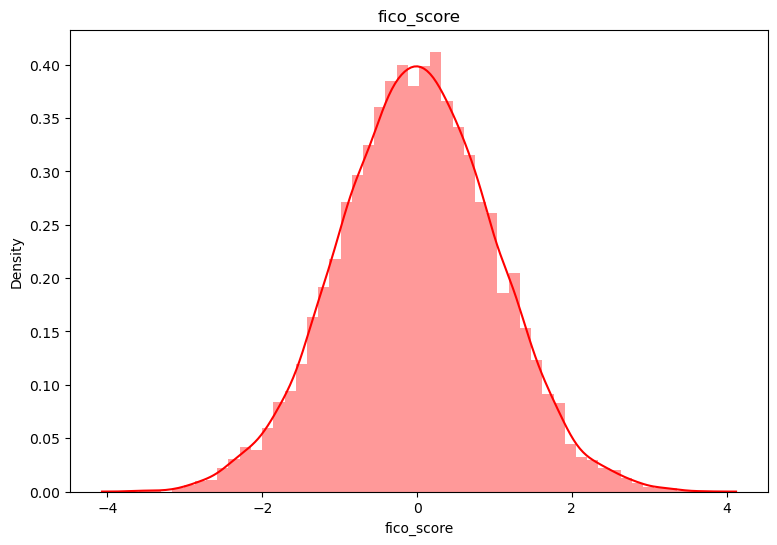

In [241]:
for col in PowerTransformer_scaled[continuous_features]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = PowerTransformer_scaled[col]
    sns.distplot(feature, ax = ax, color="red")
    ax.set_title(col)
plt.show()

In [242]:
df[continuous_features] = pd.DataFrame(PowerTransformer_scaled, columns=continuous_features)

In [243]:
df = df.drop('customer_id', axis = 1)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,0.770332,-0.685382,0.397316,5,-0.547180,0
1,5,-1.656362,0.200039,-2.154874,2,-1.080240,1
2,0,-0.516814,-1.339855,-0.209689,4,-0.595981,0
3,0,0.471554,-1.142906,0.213562,5,-0.433050,0
4,1,-2.236603,-1.462384,-2.312546,6,-0.121448,0


<Axes: >

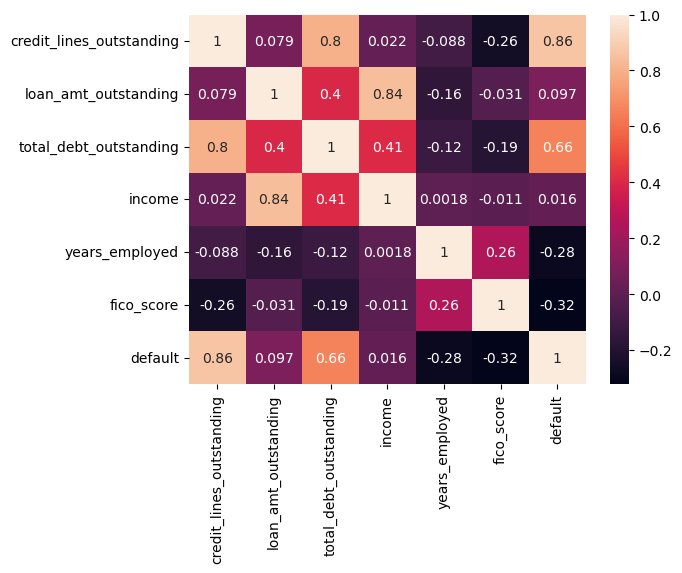

In [244]:
sns.heatmap(df.corr(), annot= True)

## Model Training

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

In [246]:
# Split the data into features and target (assuming 'default' column indicates default status)
X = df.drop(columns=["default"])
y = df["default"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model (for PD prediction)
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(X_train, y_train)

# Predict probabilities (PD)
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]  # PD values

# Decision Tree/Random Forest Model (for comparison)
rf_model = RandomForestClassifier(class_weight="balanced", n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # PD values

# Evaluate both models
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_proba_log))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))

Logistic Regression AUC-ROC: 0.9999233266607482
Random Forest AUC-ROC: 0.9997744901786715


In [247]:
# Define the expected loss function
def expected_loss(loan_amount, pd, recovery_rate=0.10):
    return loan_amount * pd * (1 - recovery_rate)